In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# print number of features and shape of data
print ('Number of records is ',data.shape[0])
print ('Number of features is ',len(data.columns))

Number of records is  5000
Number of features is  14


### Data Type of Attributes

In [4]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Missing Attributes in Data

    - We find that there are no missing values in the dataset

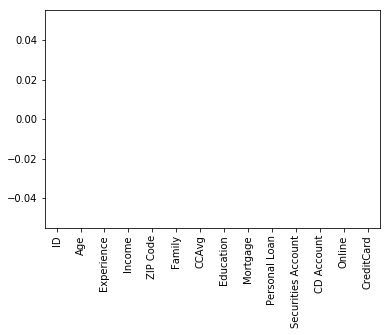

In [5]:
data.isnull().sum().plot(kind='bar')

### 5 Points Summary of Numerical Attributes - WIP

    The five-number summary involves the calculation of 5 summary statistical quantities: namely:
    1. Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
    2. 1st Quartile: The 25th percentile.
    3. 3rd Quartile: The 75th percentile.
    4. Minimum: The smallest observation in the sample.
    5. Maximum: The largest observation in the sample.

In [6]:
def print_five_point_summary(feature, feature_name, do_print=True):
    median = np.median(feature)
    
    sorted_feature_data = sorted(feature)
    q1, q3= np.percentile(sorted_feature_data,[25,75])

    min_value = np.min(sorted_feature_data)
    max_value = np.max(sorted_feature_data)

    if do_print:
        print ('\nPrinting 5 point summary for %s'%(feature_name))
        print ('-----------------------------------')
        print ('\nMax value of %s is %d'%(feature_name, max_value))
        print ('Min value of %s is %d'%(feature_name, min_value))
        print ('Median value of %s is %d'%(feature_name, median))
        print ('1st Quartile value of %s is %d'%(feature_name, q1))
        print ('3rd Quartile value of %s is %d'%(feature_name, q3))

    five_point_summary = {'median':median,
                         'q1':q1,
                         'q3':q3,
                         'minvalue':min_value,
                         'max_value':max_value}
    return five_point_summary

In [7]:
for col in data.columns:
    if (data[col].dtype == 'int64' or data[col].dtype == 'float64'):
        print_five_point_summary(data[col], col)


Printing 5 point summary for ID
-----------------------------------

Max value of ID is 5000
Min value of ID is 1
Median value of ID is 2500
1st Quartile value of ID is 1250
3rd Quartile value of ID is 3750

Printing 5 point summary for Age
-----------------------------------

Max value of Age is 67
Min value of Age is 23
Median value of Age is 45
1st Quartile value of Age is 35
3rd Quartile value of Age is 55

Printing 5 point summary for Experience
-----------------------------------

Max value of Experience is 43
Min value of Experience is -3
Median value of Experience is 20
1st Quartile value of Experience is 10
3rd Quartile value of Experience is 30

Printing 5 point summary for Income
-----------------------------------

Max value of Income is 224
Min value of Income is 8
Median value of Income is 64
1st Quartile value of Income is 39
3rd Quartile value of Income is 98

Printing 5 point summary for ZIP Code
-----------------------------------

Max value of ZIP Code is 96651
Min 

### Comparing relation between loan acceptance and salary

    Interestingly we find that 
    1. people with higher salary are more likely to accept personal loan
    2. people with high mortgage are more likely to accept personal loan
    3. Most loan takers are between 30 and 60 years of age
    4. Most loan takes have around 10 to 40 years of experience. Which concurs with the observation around age
    5. People who do more credit transactions are more likely to accept personal loan
    6. There isn't any relation to indicate that customers who have banks credit card are more likely to take personal loan

Mean Income of people who accepted loan  144.74583333333334
Mean Income of people who rejected loan  66.23738938053097


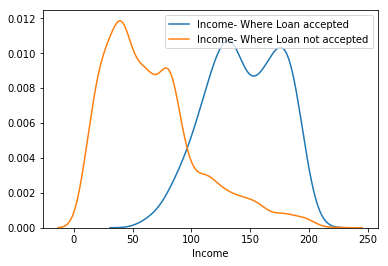

Mean Mortgage of people who accepted loan  100.84583333333333
Mean Mortgage of people who rejected loan  51.78938053097345


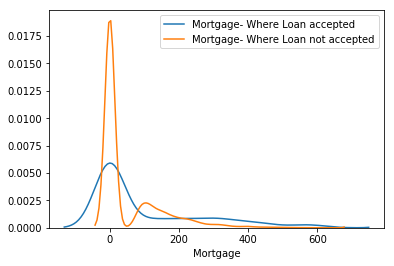

Mean Age of people who accepted loan  45.06666666666667
Mean Age of people who rejected loan  45.36725663716814


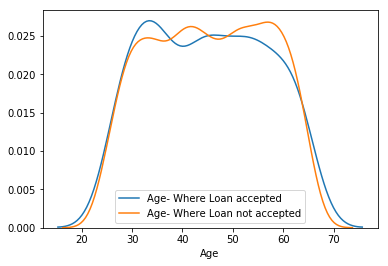

Mean Experience of people who accepted loan  19.84375
Mean Experience of people who rejected loan  20.132300884955754


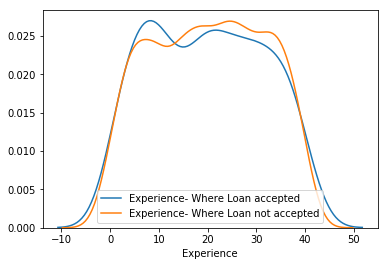

Mean CreditCard of people who accepted loan  0.29791666666666666
Mean CreditCard of people who rejected loan  0.29358407079646015


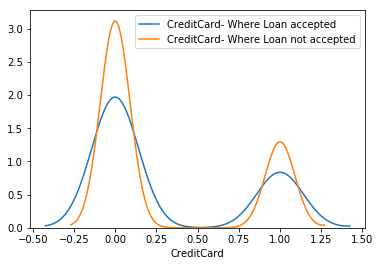

Mean CCAvg of people who accepted loan  3.9053541666666662
Mean CCAvg of people who rejected loan  1.7290088495575293


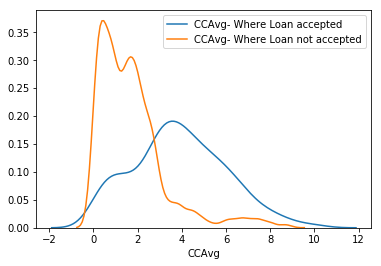

Mean Family of people who accepted loan  2.6125
Mean Family of people who rejected loan  2.3734513274336284


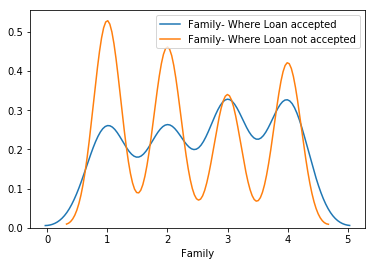

Mean Securities Account of people who accepted loan  0.125
Mean Securities Account of people who rejected loan  0.10221238938053097


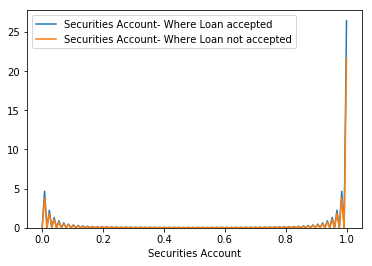

In [8]:
def compare_one_feature_with_loan_acceptance(comparative_feature):
    loans_accepted = data[data['Personal Loan']==1]
    loans_accepted_df = pd.DataFrame(data=loans_accepted)

    loans_rejected = data[data['Personal Loan']==0]
    loans_rejected_df = pd.DataFrame(data=loans_rejected)

    mean_where_loan_accepted = np.mean(loans_accepted[comparative_feature])
    mean_where_loan_not_accepted = np.mean(loans_rejected_df[comparative_feature])

    print ('Mean '+comparative_feature +' of people who accepted loan ', mean_where_loan_accepted)
    print ('Mean '+comparative_feature +' of people who rejected loan ', mean_where_loan_not_accepted)

    sns.distplot(loans_accepted_df[comparative_feature], hist=False, label=comparative_feature+ '- Where Loan accepted')
    sns.distplot(loans_rejected_df[comparative_feature], hist=False, label=comparative_feature+ '- Where Loan not accepted')
    plt.legend()
    plt.show()
    
compare_one_feature_with_loan_acceptance('Income')
compare_one_feature_with_loan_acceptance('Mortgage')
compare_one_feature_with_loan_acceptance('Age')
compare_one_feature_with_loan_acceptance('Experience')
compare_one_feature_with_loan_acceptance('CreditCard')
compare_one_feature_with_loan_acceptance('CCAvg')
compare_one_feature_with_loan_acceptance('Family')
compare_one_feature_with_loan_acceptance('Securities Account')


### Assessing relation between Education & Income levels and acceptance to personal load

    To further analyse the impact of Education & Income levels we create two new features.
        Income_Levels - This represents three values 'Low, Mid or High Income'
        Education_Levels - This represents three values 'Undergrad, Graduate or Advanced'
    
    Most loans are accepted by people with high education levels (Advanced/Professionals) - Image 1 below
    Most loans are accepted by people with high income levels - Image 2 below
    There are no acceptance be people with low income levels
    
    

In [9]:
loans_accepted = data[data['Personal Loan']==1]

def gen_income_levels(income):
    
    if income <50 :
        return 'Low Income'
    elif income > 100 :
        return 'High Income'
    else :
        return 'Mid Income'
    
loans_accepted['Income_Levels'] = loans_accepted['Income'].apply(gen_income_levels)

def gen_education_levels(education):
    if education == 1:
        return 'Undergrad'
    elif education == 2:
        return 'Graduate'
    elif education == 3:
        return 'Advanced/Professional'
    else :
        return 'Error'
loans_accepted['Education_Levels'] = loans_accepted['Education'].apply(gen_education_levels)

C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


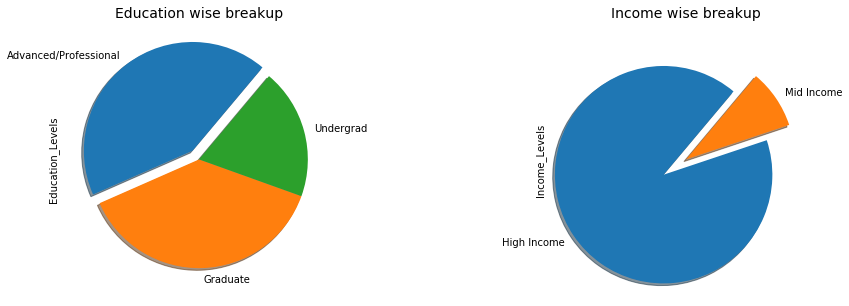

In [12]:

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Education wise breakup", fontsize=14)
loans_accepted["Education_Levels"].value_counts().plot.pie(explode=[0.1,0,0], shadow=True, startangle=50, ax=ax[0])

ax[1].set_title("Income wise breakup", fontsize=14)
loans_accepted["Income_Levels"].value_counts().plot.pie(explode=[0.25,0], shadow=True, startangle=50, ax=ax[1])

plt.show()

###  Target column distribution

    -- We see that the target feature is imbalanced with majority value being 0. This indicates that majority of people decline the personal loan offer

## Finding Important Features Or Correlation Matrix with Heatmap

    - One of the ways we can find important features for this dataset is to plot a HeatMap which would show corerelation between each feature
    
    - Here we see that 'Personal Loan' feature is highly corelated to Income and CCAvg features. So people who have higher income and people who use their credit cards more often are more likely to accept the offer for personal loan
    
    - Mortgage and Education are the other two features which corelate - i.e. they also have an impact on person accepting the offer.

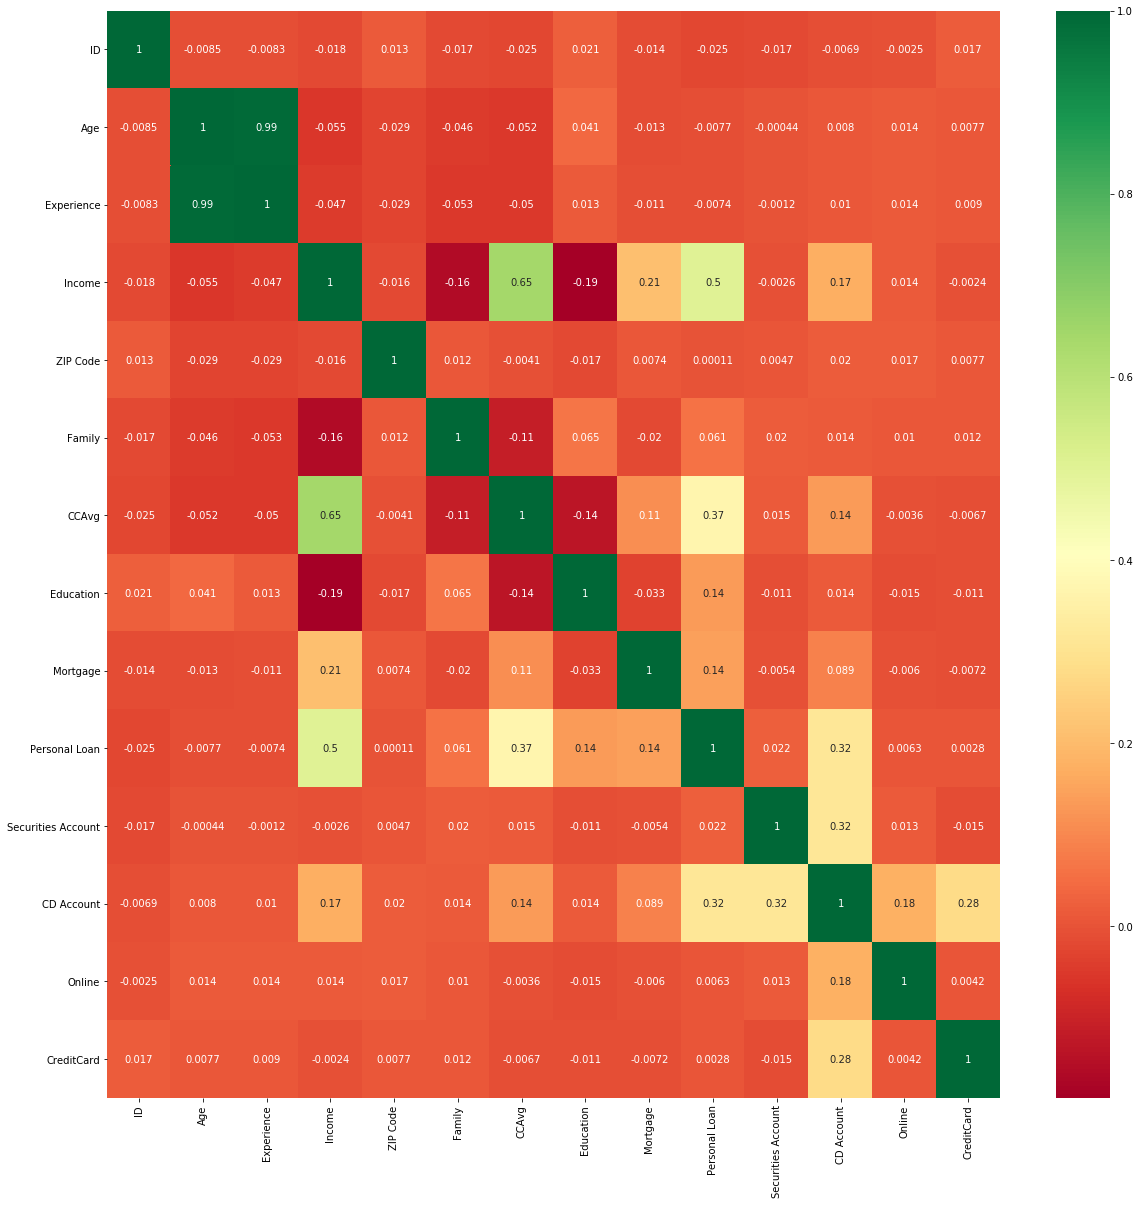

In [13]:
corelation_matrix = data.corr()
top_corelation_features = corelation_matrix.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corelation_features].corr(), annot=True, cmap='RdYlGn')